In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
import tensorflow as tf
from tensorflow.python.keras.layers import Dense, Dropout, LSTM
from tensorflow.python.keras import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [11]:
house_data = pd.read_excel("Clean_Data.xlsx")
house_data

,Date,Time,DateTime,System Setting,System Mode,Calendar Event,Program Mode,Cool Set Temp (C),Heat Set Temp (C),Current Temp (C),...,Thermostat Humidity (%RH),Thermostat Motion,Bedroom (C),Bedroom2,3rd floor landing (C),3rd floor landing2,3rd floor room (C),3rd floor room2,Basement (C),Basement2
0,2020-12-10,12:50:00,2020/12/10 12:50:00,heat,heatOff,auto,Home,21.0,21.0,21.3,...,30.0,1.0,21.6,0.0,20.9,0.0,21.0,0.0,22.8,0.0
1,2020-12-10,12:55:00,2020/12/10 12:55:00,heat,heatOff,auto,Home,21.0,21.0,21.1,...,32.0,1.0,21.6,0.0,20.9,0.0,20.9,0.0,22.7,1.0
2,2020-12-10,13:00:00,2020/12/10 13:00:00,heat,heatOff,auto,Home,21.0,21.0,20.9,...,32.0,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.7,1.0
3,2020-12-10,13:05:00,2020/12/10 13:05:00,heat,heatOff,auto,Home,21.0,21.0,20.7,...,33.0,0.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0
4,2020-12-10,13:10:00,2020/12/10 13:10:00,heat,heatStage1On,auto,Home,21.0,21.0,20.6,...,33.0,1.0,21.6,0.0,20.8,0.0,20.8,0.0,22.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29671,2021-03-23,14:25:00,2021/3/23 14:25:00,heat,heatOff,NaN,Home,21.0,21.0,21.2,...,21.0,0.0,21.9,0.0,21.8,0.0,21.3,0.0,22.0,1.0
29672,2021-03-23,14:30:00,2021/3/23 14:30:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,0.0,21.3,0.0,22.1,0.0
29673,2021-03-23,14:35:00,2021/3/23 14:35:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,1.0,21.3,0.0,22.1,0.0
29674,2021-03-23,14:40:00,2021/3/23 14:40:00,heat,heatOff,NaN,Home,21.0,21.0,21.1,...,21.0,0.0,21.9,0.0,21.8,1.0,21.3,0.0,22.1,0.0


In [12]:
enc = preprocessing.OneHotEncoder()

In [13]:
house_data = house_data.fillna(method = "bfill")
house_data.isnull().sum()

Date                              0
Time                              0
DateTime                          0
System Setting                    0
System Mode                       0
Calendar Event                29548
Program Mode                      0
Cool Set Temp (C)                 0
Heat Set Temp (C)                 0
Current Temp (C)                  0
Current Humidity (%RH)            0
Outdoor Temp (C)                  0
Wind Speed (km/h)                 0
Cool Stage 1 (sec)                0
Heat Stage 1 (sec)                0
Fan (sec)                         0
Thermostat Temperature (C)        0
Thermostat Humidity (%RH)         0
Thermostat Motion                 0
Bedroom (C)                       0
Bedroom2                          0
3rd floor landing (C)             0
3rd floor landing2                0
3rd floor room (C)                0
3rd floor room2                   0
Basement (C)                      0
Basement2                         0
dtype: int64

In [14]:
numerical_vars = ['Heat Set Temp (C)', 'Current Temp (C)', 'Current Humidity (%RH)', 'Outdoor Temp (C)','Thermostat Temperature (C)', 'Thermostat Humidity (%RH)']
sc = StandardScaler()
sc.fit(house_data[numerical_vars])

StandardScaler()

In [15]:
scaler_house_data = house_data[numerical_vars].copy()
scaler_house_data[numerical_vars] = sc.transform(house_data[numerical_vars])
scaler_house_data

,Heat Set Temp (C),Current Temp (C),Current Humidity (%RH),Outdoor Temp (C),Thermostat Temperature (C),Thermostat Humidity (%RH)
0,0.0,2.632689,1.422976,1.387394,2.632689,1.422976
1,0.0,1.489502,1.930176,1.387394,1.489502,1.930176
2,0.0,0.346315,1.930176,1.424799,0.346315,1.930176
3,0.0,-0.796872,2.183776,1.424799,-0.796872,2.183776
4,0.0,-1.368465,2.183776,1.424799,-1.368465,2.183776
...,...,...,...,...,...,...
29671,0.0,2.061095,-0.859425,3.295068,2.061095,-0.859425
29672,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425
29673,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425
29674,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425


In [16]:
y_auxHeat = house_data['Heat Stage 1 (sec)'].to_numpy()
y_fan = house_data['Fan (sec)'].to_numpy()
#oe = OrdinalEncoder()
#y_auxHeat = oe.fit_transform(y_auxHeat.reshape(-1, 1))
#y_fan = oe.fit_transform(y_fan.reshape(-1, 1))
#y_auxHeat = y_auxHeat.reshape(y_auxHeat.shape[0], )
#y_fan = y_fan.reshape(y_fan.shape[0], )
y_auxHeat = y_auxHeat.astype(int)
y_auxHeat = y_auxHeat.astype(str)

y_fan = y_fan.astype(int)
y_fan = y_fan.astype(str)
scaler_house_data['Heat Stage 1'] = y_auxHeat
scaler_house_data['fan'] = y_fan

In [17]:
scaler_house_data

,Heat Set Temp (C),Current Temp (C),Current Humidity (%RH),Outdoor Temp (C),Thermostat Temperature (C),Thermostat Humidity (%RH),Heat Stage 1,fan
0,0.0,2.632689,1.422976,1.387394,2.632689,1.422976,0,0
1,0.0,1.489502,1.930176,1.387394,1.489502,1.930176,0,0
2,0.0,0.346315,1.930176,1.424799,0.346315,1.930176,0,0
3,0.0,-0.796872,2.183776,1.424799,-0.796872,2.183776,135,135
4,0.0,-1.368465,2.183776,1.424799,-1.368465,2.183776,300,300
...,...,...,...,...,...,...,...,...
29671,0.0,2.061095,-0.859425,3.295068,2.061095,-0.859425,0,0
29672,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0,0
29673,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0,0
29674,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0,0


In [18]:
working_df = scaler_house_data.drop(labels = ["fan"], axis = 1)
working_df

,Heat Set Temp (C),Current Temp (C),Current Humidity (%RH),Outdoor Temp (C),Thermostat Temperature (C),Thermostat Humidity (%RH),Heat Stage 1
0,0.0,2.632689,1.422976,1.387394,2.632689,1.422976,0
1,0.0,1.489502,1.930176,1.387394,1.489502,1.930176,0
2,0.0,0.346315,1.930176,1.424799,0.346315,1.930176,0
3,0.0,-0.796872,2.183776,1.424799,-0.796872,2.183776,135
4,0.0,-1.368465,2.183776,1.424799,-1.368465,2.183776,300
...,...,...,...,...,...,...,...
29671,0.0,2.061095,-0.859425,3.295068,2.061095,-0.859425,0
29672,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29673,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29674,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0


In [19]:
def series_to_supervised(data, n_in = 1, n_out = 1, dropnan = True):
    
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [20]:
reframed = series_to_supervised(working_df, 12, 1)
reframed

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var7(t-12),var1(t-11),var2(t-11),var3(t-11),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
12,0.0,2.632689,1.422976,1.387394,2.632689,1.422976,0,0.0,1.489502,1.930176,...,0.346315,2.183776,0,0.0,-0.225278,2.183776,1.462204,-0.225278,2.183776,0
13,0.0,1.489502,1.930176,1.387394,1.489502,1.930176,0,0.0,0.346315,1.930176,...,-0.225278,2.183776,0,0.0,-0.225278,2.183776,1.462204,-0.225278,2.183776,0
14,0.0,0.346315,1.930176,1.424799,0.346315,1.930176,0,0.0,-0.796872,2.183776,...,-0.225278,2.183776,0,0.0,-0.796872,2.183776,1.443502,-0.796872,2.183776,255
15,0.0,-0.796872,2.183776,1.424799,-0.796872,2.183776,135,0.0,-1.368465,2.183776,...,-0.796872,2.183776,255,0.0,-0.796872,2.183776,1.443502,-0.796872,2.183776,300
16,0.0,-1.368465,2.183776,1.424799,-1.368465,2.183776,300,0.0,-0.796872,2.183776,...,-0.796872,2.183776,300,0.0,0.346315,2.183776,1.443502,0.346315,2.183776,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29671,0.0,3.204282,-0.098625,3.145447,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,2.061095,-0.859425,0,0.0,2.061095,-0.859425,3.295068,2.061095,-0.859425,0
29672,0.0,3.204282,-0.098625,3.238960,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,2.061095,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29673,0.0,3.204282,-0.098625,3.238960,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,1.489502,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29674,0.0,3.204282,-0.098625,3.238960,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,1.489502,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0


In [21]:
y_auxHeat = reframed['var7(t)']
#y_auxHeat = to_categorical(y_auxHeat)

In [ ]:
y_auxHeat

In [ ]:
#test = np.argmax(y_auxHeat, axis = 1)

In [ ]:
#(unique, counts) = np.unique(test, return_counts = True)
#frequencies = np.asarray((unique, counts)).T
#frequencies

In [ ]:
#plt.hist(frequencies)
#plt.show()

In [ ]:
#class_weight = class_weight.compute_class_weight('balanced', classes = np.unique(test), y = test)

In [22]:
X = reframed.drop(labels = ['var7(t)'], axis = 1)

In [23]:
sc = StandardScaler()
sc.fit(np.array(y_auxHeat).reshape(-1,1))
y_auxHeat = sc.transform(np.array(y_auxHeat).reshape(-1,1))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y_auxHeat, test_size = 0.2, shuffle = True)

In [ ]:
# smote =RandomUnderSampler(sampling_strategy = 'all')
# X_train, y_train = smote.fit_resample(X_train, y_train)
# X_train, y_train

In [ ]:
#test = np.argmax(y_train, axis = 1)

In [ ]:
#(unique, counts) = np.unique(test, return_counts = True)
#frequencies = np.asarray((unique, counts)).T

In [25]:
X_train.shape,X_test.shape

((23731, 90), (5933, 90))

In [26]:
X_train = X_train.values
X_test = X_test.values

In [27]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [19]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 90))

# Adding the second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mse']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 50, shuffle = True)

Epoch 1/50
371/371 [==============================] - 0s 1ms/step - loss: 0.3331 - mse: 0.2666 - val_loss: 0.2641 - val_mse: 0.1922
Epoch 2/50
371/371 [==============================] - 0s 765us/step - loss: 0.2435 - mse: 0.1813 - val_loss: 0.2330 - val_mse: 0.1740
Epoch 3/50
371/371 [==============================] - 0s 685us/step - loss: 0.2245 - mse: 0.1666 - val_loss: 0.2215 - val_mse: 0.1681
Epoch 4/50
371/371 [==============================] - 0s 749us/step - loss: 0.2138 - mse: 0.1554 - val_loss: 0.2194 - val_mse: 0.1548
Epoch 5/50
371/371 [==============================] - 0s 669us/step - loss: 0.2008 - mse: 0.1421 - val_loss: 0.1902 - val_mse: 0.1289
Epoch 6/50
371/371 [==============================] - 0s 615us/step - loss: 0.1879 - mse: 0.1302 - val_loss: 0.1870 - val_mse: 0.1340
Epoch 7/50
371/371 [==============================] - 0s 667us/step - loss: 0.1804 - mse: 0.1220 - val_loss: 0.1738 - val_mse: 0.1113
Epoch 8/50
371/371 [==============================] - 0s 644us/s

In [20]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                2184      
_________________________________________________________________
dense_1 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 2,809
Trainable params: 2,809
Non-trainable params: 0
_________________________________________________________________


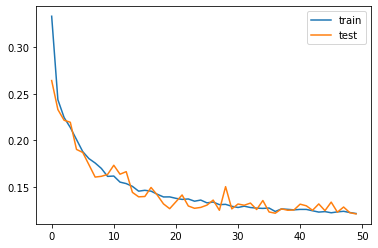

In [21]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
#plt.savefig("8.png")
plt.show()

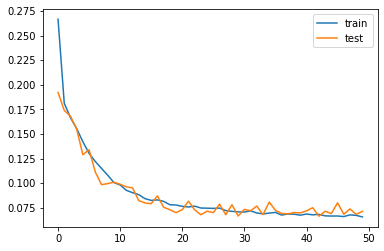

In [22]:
plt.plot(history.history['mse'], label = 'train')
plt.plot(history.history['val_mse'], label = 'test')
plt.legend()
#plt.savefig("9.png")
plt.show()

In [ ]:
y_predicted = classifier.predict(X_test)

In [ ]:
y_predicted = np.argmax(y_predicted, axis = 1)
y_predicted

In [ ]:
y_test = np.argmax(y_test, axis = 1)

In [ ]:
test_sum = 0
for i in range(len(y_test)):
    test_sum += (y_test[i] * 15)

In [ ]:
test_sum

In [ ]:
predicted_sum = 0
for i in range(len(y_predicted)):
    predicted_sum += (y_predicted[i] * 15)

In [ ]:
predicted_sum

In [ ]:
print("Error Percentage in predicted values is : {} %".format(np.absolute((predicted_sum - test_sum)/test_sum)*100))

In [ ]:
from sklearn.metrics import mean_absolute_error,f1_score,accuracy_score

In [ ]:
y_train_predicted = classifier.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis = 1)
y_train = np.argmax(y_train, axis = 1)

In [ ]:
f1_score(y_train, y_train_predicted, average = 'weighted')

In [ ]:
accuracy_score(y_train, y_train_predicted)

In [ ]:
mean_absolute_error(y_train, y_train_predicted)

In [ ]:
mean_absolute_error(y_test, y_predicted)

In [ ]:
accuracy_score(y_test, y_predicted)

In [ ]:
f1_score(y_test, y_predicted, average = 'weighted')

In [23]:
reframed_2 = series_to_supervised(working_df, 12, 1)
reframed_2

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var7(t-12),var1(t-11),var2(t-11),var3(t-11),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
12,0.0,2.632689,1.422976,1.387394,2.632689,1.422976,0,0.0,1.489502,1.930176,...,0.346315,2.183776,0,0.0,-0.225278,2.183776,1.462204,-0.225278,2.183776,0
13,0.0,1.489502,1.930176,1.387394,1.489502,1.930176,0,0.0,0.346315,1.930176,...,-0.225278,2.183776,0,0.0,-0.225278,2.183776,1.462204,-0.225278,2.183776,0
14,0.0,0.346315,1.930176,1.424799,0.346315,1.930176,0,0.0,-0.796872,2.183776,...,-0.225278,2.183776,0,0.0,-0.796872,2.183776,1.443502,-0.796872,2.183776,255
15,0.0,-0.796872,2.183776,1.424799,-0.796872,2.183776,135,0.0,-1.368465,2.183776,...,-0.796872,2.183776,255,0.0,-0.796872,2.183776,1.443502,-0.796872,2.183776,300
16,0.0,-1.368465,2.183776,1.424799,-1.368465,2.183776,300,0.0,-0.796872,2.183776,...,-0.796872,2.183776,300,0.0,0.346315,2.183776,1.443502,0.346315,2.183776,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29671,0.0,3.204282,-0.098625,3.145447,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,2.061095,-0.859425,0,0.0,2.061095,-0.859425,3.295068,2.061095,-0.859425,0
29672,0.0,3.204282,-0.098625,3.238960,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,2.061095,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29673,0.0,3.204282,-0.098625,3.238960,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,1.489502,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29674,0.0,3.204282,-0.098625,3.238960,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,1.489502,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0


In [ ]:
y_auxHeat = reframed_2['var7(t)']
y_auxHeat = to_categorical(y_auxHeat)
X.shape

In [ ]:
X = reframed_2.drop(labels = ['var7(t)'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y_auxHeat, test_size = 0.2, shuffle = True)

In [ ]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)
X_train.shape

In [ ]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 90))

# Adding the second hidden layer
classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 21, kernel_initializer = 'uniform', activation = 'softmax'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) 

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, validation_data = (X_test, y_test), batch_size = 64, epochs = 50, shuffle = True)

In [ ]:
classifier.summary()

In [ ]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.savefig("10.png")
plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.savefig("11.png")
plt.show()

In [ ]:
y_predicted = classifier.predict(X_test)
y_predicted = np.argmax(y_predicted, axis = 1)
y_predicted

In [ ]:
y_test = np.argmax(y_test, axis = 1)

In [ ]:
test_sum = 0
for i in range(len(y_test)):
    test_sum += (y_test[i] * 15)
test_sum

In [ ]:
predicted_sum = 0
for i in range(len(y_predicted)):
    predicted_sum += (y_predicted[i] * 15)

In [ ]:
print("Error Percentage in predicted values is : {} %".format(np.absolute((predicted_sum - test_sum)/test_sum)*100))

In [ ]:
y_train_predicted = classifier.predict(X_train)
y_train_predicted = np.argmax(y_train_predicted, axis = 1)
y_train_predicted

In [ ]:
y_train = np.argmax(y_train, axis = 1)

In [ ]:
f1_score(y_train, y_train_predicted, average = 'weighted')

In [ ]:
mean_absolute_error(y_train, y_train_predicted)

In [ ]:
accuracy_score(y_train, y_train_predicted)

In [ ]:
f1_score(y_test, y_predicted, average = 'weighted')

In [ ]:
mean_absolute_error(y_test, y_predicted)

In [ ]:
accuracy_score(y_test, y_predicted)

In [5]:
from sklearn.model_selection import cross_validate, GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor


Using TensorFlow backend.


In [62]:
import keras.wrappers.scikit_learn as kkk
dir(kkk)

['BaseWrapper',
 'KerasClassifier',
 'KerasRegressor',
 'Sequential',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'copy',
 'division',
 'has_arg',
 'losses',
 'np',
 'print_function',
 'to_categorical',
 'to_list',
 'types']

In [25]:
reframed = series_to_supervised(working_df, 12, 1)
reframed

,var1(t-12),var2(t-12),var3(t-12),var4(t-12),var5(t-12),var6(t-12),var7(t-12),var1(t-11),var2(t-11),var3(t-11),...,var5(t-1),var6(t-1),var7(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t)
12,0.0,2.632689,1.422976,1.387394,2.632689,1.422976,0,0.0,1.489502,1.930176,...,0.346315,2.183776,0,0.0,-0.225278,2.183776,1.462204,-0.225278,2.183776,0
13,0.0,1.489502,1.930176,1.387394,1.489502,1.930176,0,0.0,0.346315,1.930176,...,-0.225278,2.183776,0,0.0,-0.225278,2.183776,1.462204,-0.225278,2.183776,0
14,0.0,0.346315,1.930176,1.424799,0.346315,1.930176,0,0.0,-0.796872,2.183776,...,-0.225278,2.183776,0,0.0,-0.796872,2.183776,1.443502,-0.796872,2.183776,255
15,0.0,-0.796872,2.183776,1.424799,-0.796872,2.183776,135,0.0,-1.368465,2.183776,...,-0.796872,2.183776,255,0.0,-0.796872,2.183776,1.443502,-0.796872,2.183776,300
16,0.0,-1.368465,2.183776,1.424799,-1.368465,2.183776,300,0.0,-0.796872,2.183776,...,-0.796872,2.183776,300,0.0,0.346315,2.183776,1.443502,0.346315,2.183776,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29671,0.0,3.204282,-0.098625,3.145447,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,2.061095,-0.859425,0,0.0,2.061095,-0.859425,3.295068,2.061095,-0.859425,0
29672,0.0,3.204282,-0.098625,3.238960,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,2.061095,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29673,0.0,3.204282,-0.098625,3.238960,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,1.489502,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0
29674,0.0,3.204282,-0.098625,3.238960,3.204282,-0.098625,0,0.0,3.204282,-0.098625,...,1.489502,-0.859425,0,0.0,1.489502,-0.859425,3.388582,1.489502,-0.859425,0


In [26]:
y_auxHeat = reframed['var7(t)']
sc = StandardScaler()
sc.fit(np.array(y_auxHeat).reshape(-1,1))
y_auxHeat = sc.transform(np.array(y_auxHeat).reshape(-1,1))

In [27]:
X = reframed.drop(labels = ['var7(t)'], axis = 1).astype(float)
X.shape

(29664, 90)

In [28]:
def build_classifier(optimizer):

    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 90))

    # Adding the second hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mse']) 
    
    return classifier

In [29]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 10, nb_epoch = 20)

In [30]:
scoring = {'kk': 'neg_mean_absolute_error'}

parameters = {'batch_size' : [10, 64,100],
              'epochs' : [10, 50],
              'optimizer' : ['adam', 'rmsprop']}

In [31]:
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = scoring,
                           refit = False,
                           cv = 10)

In [32]:
grid_search.fit(X, y_auxHeat)

Epoch 1/10
2670/2670 [==============================] - 1s 465us/step - loss: 2.2415 - mse: 17.6777
Epoch 2/10
2670/2670 [==============================] - 1s 462us/step - loss: 1.7348 - mse: 12.2913
Epoch 3/10
2670/2670 [==============================] - 1s 462us/step - loss: 1.5427 - mse: 9.9777
Epoch 4/10
2670/2670 [==============================] - 1s 458us/step - loss: 1.4371 - mse: 8.8202
Epoch 5/10
2670/2670 [==============================] - 1s 460us/step - loss: 1.3703 - mse: 8.2174
Epoch 6/10
2670/2670 [==============================] - 1s 466us/step - loss: 1.3154 - mse: 7.6552
Epoch 7/10
2670/2670 [==============================] - 1s 462us/step - loss: 1.2745 - mse: 7.3356
Epoch 8/10
2670/2670 [==============================] - 1s 462us/step - loss: 1.2665 - mse: 7.2466
Epoch 9/10
2670/2670 [==============================] - 1s 482us/step - loss: 1.2447 - mse: 7.0599
Epoch 10/10
2670/2670 [==============================] - 1s 492us/step - loss: 1.2074 - mse: 6.6944
Epoch 1

2670/2670 [==============================] - 1s 456us/step - loss: 1.4341 - mse: 8.6302
Epoch 6/10
2670/2670 [==============================] - 1s 462us/step - loss: 1.3789 - mse: 8.1609
Epoch 7/10
2670/2670 [==============================] - 1s 465us/step - loss: 1.3567 - mse: 8.0090
Epoch 8/10
2670/2670 [==============================] - 1s 483us/step - loss: 1.3263 - mse: 7.7107
Epoch 9/10
2670/2670 [==============================] - 1s 454us/step - loss: 1.2971 - mse: 7.3994
Epoch 10/10
2670/2670 [==============================] - 1s 455us/step - loss: 1.2602 - mse: 7.0883
Epoch 1/10
2670/2670 [==============================] - 1s 454us/step - loss: 2.3368 - mse: 18.5679
Epoch 2/10
2670/2670 [==============================] - 1s 455us/step - loss: 1.8059 - mse: 12.9640
Epoch 3/10
2670/2670 [==============================] - 1s 503us/step - loss: 1.6410 - mse: 11.0218
Epoch 4/10
2670/2670 [==============================] - 1s 475us/step - loss: 1.5342 - mse: 9.7391
Epoch 5/10
2670/2

2670/2670 [==============================] - 1s 461us/step - loss: 1.0758 - mse: 5.5485
Epoch 30/50
2670/2670 [==============================] - 1s 461us/step - loss: 1.0684 - mse: 5.5291
Epoch 31/50
2670/2670 [==============================] - 1s 460us/step - loss: 1.0579 - mse: 5.3816
Epoch 32/50
2670/2670 [==============================] - 1s 461us/step - loss: 1.0594 - mse: 5.4434
Epoch 33/50
2670/2670 [==============================] - 1s 459us/step - loss: 1.0479 - mse: 5.3568
Epoch 34/50
2670/2670 [==============================] - 1s 469us/step - loss: 1.0468 - mse: 5.3249
Epoch 35/50
2670/2670 [==============================] - 1s 467us/step - loss: 1.0398 - mse: 5.3344
Epoch 36/50
2670/2670 [==============================] - 1s 461us/step - loss: 1.0411 - mse: 5.3277
Epoch 37/50
2670/2670 [==============================] - 1s 460us/step - loss: 1.0454 - mse: 5.4161
Epoch 38/50
2670/2670 [==============================] - 1s 462us/step - loss: 1.0316 - mse: 5.2531
Epoch 39/50


2670/2670 [==============================] - 1s 462us/step - loss: 1.0799 - mse: 5.6235
Epoch 44/50
2670/2670 [==============================] - 1s 461us/step - loss: 1.0798 - mse: 5.6464
Epoch 45/50
2670/2670 [==============================] - 1s 459us/step - loss: 1.0852 - mse: 5.6891
Epoch 46/50
2670/2670 [==============================] - 1s 459us/step - loss: 1.0741 - mse: 5.5539
Epoch 47/50
2670/2670 [==============================] - 1s 487us/step - loss: 1.0670 - mse: 5.5611
Epoch 48/50
2670/2670 [==============================] - 1s 460us/step - loss: 1.0775 - mse: 5.6493
Epoch 49/50
2670/2670 [==============================] - 1s 510us/step - loss: 1.0667 - mse: 5.5775
Epoch 50/50
2670/2670 [==============================] - 1s 539us/step - loss: 1.0768 - mse: 5.6455
Epoch 1/50
2670/2670 [==============================] - 1s 493us/step - loss: 2.4324 - mse: 19.0740
Epoch 2/50
2670/2670 [==============================] - 1s 460us/step - loss: 1.8012 - mse: 12.6103
Epoch 3/50
2

2670/2670 [==============================] - 1s 479us/step - loss: 1.3214 - mse: 7.4288
Epoch 8/50
2670/2670 [==============================] - 1s 482us/step - loss: 1.3059 - mse: 7.3399
Epoch 9/50
2670/2670 [==============================] - 1s 479us/step - loss: 1.2789 - mse: 6.9244
Epoch 10/50
2670/2670 [==============================] - 1s 481us/step - loss: 1.2457 - mse: 6.7518
Epoch 11/50
2670/2670 [==============================] - 1s 482us/step - loss: 1.2386 - mse: 6.6759
Epoch 12/50
2670/2670 [==============================] - 1s 473us/step - loss: 1.2340 - mse: 6.6133
Epoch 13/50
2670/2670 [==============================] - 1s 480us/step - loss: 1.2161 - mse: 6.4862
Epoch 14/50
2670/2670 [==============================] - 1s 499us/step - loss: 1.2092 - mse: 6.3663
Epoch 15/50
2670/2670 [==============================] - 1s 473us/step - loss: 1.1878 - mse: 6.2542
Epoch 16/50
2670/2670 [==============================] - 1s 469us/step - loss: 1.1814 - mse: 6.2209
Epoch 17/50
26

2670/2670 [==============================] - 1s 452us/step - loss: 1.0872 - mse: 5.5100
Epoch 22/50
2670/2670 [==============================] - 1s 454us/step - loss: 1.0793 - mse: 5.4517
Epoch 23/50
2670/2670 [==============================] - 1s 452us/step - loss: 1.0664 - mse: 5.4170
Epoch 24/50
2670/2670 [==============================] - 1s 452us/step - loss: 1.0811 - mse: 5.5203
Epoch 25/50
2670/2670 [==============================] - 1s 451us/step - loss: 1.0742 - mse: 5.4862
Epoch 26/50
2670/2670 [==============================] - 1s 458us/step - loss: 1.0661 - mse: 5.3784
Epoch 27/50
2670/2670 [==============================] - 1s 454us/step - loss: 1.0586 - mse: 5.4030
Epoch 28/50
2670/2670 [==============================] - 1s 450us/step - loss: 1.0625 - mse: 5.4373
Epoch 29/50
2670/2670 [==============================] - 1s 453us/step - loss: 1.0426 - mse: 5.2908
Epoch 30/50
2670/2670 [==============================] - 1s 452us/step - loss: 1.0519 - mse: 5.3590
Epoch 31/50


2670/2670 [==============================] - 1s 460us/step - loss: 1.6370 - mse: 11.0932
Epoch 4/50
2670/2670 [==============================] - 1s 465us/step - loss: 1.5357 - mse: 9.9443
Epoch 5/50
2670/2670 [==============================] - 1s 459us/step - loss: 1.4289 - mse: 8.6727
Epoch 6/50
2670/2670 [==============================] - 1s 462us/step - loss: 1.3685 - mse: 8.0064
Epoch 7/50
2670/2670 [==============================] - 1s 503us/step - loss: 1.3189 - mse: 7.5244
Epoch 8/50
2670/2670 [==============================] - 1s 460us/step - loss: 1.2935 - mse: 7.3383
Epoch 9/50
2670/2670 [==============================] - 1s 458us/step - loss: 1.2510 - mse: 7.0053
Epoch 10/50
2670/2670 [==============================] - 1s 461us/step - loss: 1.2380 - mse: 6.8269
Epoch 11/50
2670/2670 [==============================] - 1s 459us/step - loss: 1.2156 - mse: 6.7198
Epoch 12/50
2670/2670 [==============================] - 1s 477us/step - loss: 1.2172 - mse: 6.6198
Epoch 13/50
2670/

2670/2670 [==============================] - 1s 464us/step - loss: 1.1731 - mse: 6.2498
Epoch 18/50
2670/2670 [==============================] - 1s 465us/step - loss: 1.1626 - mse: 6.2306
Epoch 19/50
2670/2670 [==============================] - 1s 464us/step - loss: 1.1516 - mse: 6.0478
Epoch 20/50
2670/2670 [==============================] - 1s 464us/step - loss: 1.1469 - mse: 6.0332
Epoch 21/50
2670/2670 [==============================] - 1s 466us/step - loss: 1.1359 - mse: 6.0358
Epoch 22/50
2670/2670 [==============================] - 1s 496us/step - loss: 1.1375 - mse: 5.9586
Epoch 23/50
2670/2670 [==============================] - 1s 465us/step - loss: 1.1273 - mse: 5.8799
Epoch 24/50
2670/2670 [==============================] - 1s 464us/step - loss: 1.1234 - mse: 5.8568
Epoch 25/50
2670/2670 [==============================] - 1s 498us/step - loss: 1.1158 - mse: 5.8645
Epoch 26/50
2670/2670 [==============================] - 1s 467us/step - loss: 1.1136 - mse: 5.7896
Epoch 27/50


2670/2670 [==============================] - 1s 494us/step - loss: 1.0487 - mse: 5.3073
Epoch 50/50
2670/2670 [==============================] - 1s 465us/step - loss: 1.0466 - mse: 5.2488
Epoch 1/50
2670/2670 [==============================] - 1s 462us/step - loss: 2.4638 - mse: 19.1071
Epoch 2/50
2670/2670 [==============================] - 1s 460us/step - loss: 1.8862 - mse: 13.5515
Epoch 3/50
2670/2670 [==============================] - 1s 457us/step - loss: 1.6586 - mse: 10.9658
Epoch 4/50
2670/2670 [==============================] - 1s 458us/step - loss: 1.5277 - mse: 9.4706
Epoch 5/50
2670/2670 [==============================] - 1s 458us/step - loss: 1.4449 - mse: 8.6797
Epoch 6/50
2670/2670 [==============================] - 1s 457us/step - loss: 1.3766 - mse: 7.8778
Epoch 7/50
2670/2670 [==============================] - 1s 482us/step - loss: 1.3126 - mse: 7.3538
Epoch 8/50
2670/2670 [==============================] - 1s 477us/step - loss: 1.2884 - mse: 7.1312
Epoch 9/50
2670/2

418/418 [==============================] - 0s 489us/step - loss: 1.7129 - mse: 12.0375
Epoch 6/10
418/418 [==============================] - 0s 492us/step - loss: 1.6481 - mse: 11.2775
Epoch 7/10
418/418 [==============================] - 0s 470us/step - loss: 1.5700 - mse: 10.2600
Epoch 8/10
418/418 [==============================] - 0s 492us/step - loss: 1.5191 - mse: 9.5337
Epoch 9/10
418/418 [==============================] - 0s 489us/step - loss: 1.4672 - mse: 8.9409
Epoch 10/10
418/418 [==============================] - 0s 464us/step - loss: 1.4479 - mse: 8.6050
Epoch 1/10
418/418 [==============================] - 0s 496us/step - loss: 2.8668 - mse: 24.6385
Epoch 2/10
418/418 [==============================] - 0s 494us/step - loss: 1.9975 - mse: 15.1878
Epoch 3/10
418/418 [==============================] - 0s 485us/step - loss: 1.7775 - mse: 13.3557
Epoch 4/10
418/418 [==============================] - 0s 478us/step - loss: 1.6678 - mse: 12.0949
Epoch 5/10
418/418 [=============

418/418 [==============================] - 0s 496us/step - loss: 1.4258 - mse: 8.1603
Epoch 10/10
418/418 [==============================] - 0s 492us/step - loss: 1.3736 - mse: 7.5527
Epoch 1/50
418/418 [==============================] - 0s 528us/step - loss: 2.7696 - mse: 23.6089
Epoch 2/50
418/418 [==============================] - 0s 503us/step - loss: 1.9738 - mse: 14.2757
Epoch 3/50
418/418 [==============================] - 0s 468us/step - loss: 1.7871 - mse: 12.6891
Epoch 4/50
418/418 [==============================] - 0s 496us/step - loss: 1.7022 - mse: 11.8059
Epoch 5/50
418/418 [==============================] - 0s 492us/step - loss: 1.5721 - mse: 10.5515
Epoch 6/50
418/418 [==============================] - 0s 474us/step - loss: 1.4820 - mse: 9.5514
Epoch 7/50
418/418 [==============================] - 0s 493us/step - loss: 1.4122 - mse: 8.5828
Epoch 8/50
418/418 [==============================] - 0s 494us/step - loss: 1.3559 - mse: 8.0139
Epoch 9/50
418/418 [===============

418/418 [==============================] - 0s 475us/step - loss: 1.1665 - mse: 6.1402
Epoch 16/50
418/418 [==============================] - 0s 536us/step - loss: 1.1433 - mse: 5.9767
Epoch 17/50
418/418 [==============================] - 0s 555us/step - loss: 1.1298 - mse: 5.9206
Epoch 18/50
418/418 [==============================] - 0s 555us/step - loss: 1.1307 - mse: 5.9447
Epoch 19/50
418/418 [==============================] - 0s 565us/step - loss: 1.1202 - mse: 5.7306
Epoch 20/50
418/418 [==============================] - 0s 497us/step - loss: 1.1069 - mse: 5.7088
Epoch 21/50
418/418 [==============================] - 0s 493us/step - loss: 1.0850 - mse: 5.5115
Epoch 22/50
418/418 [==============================] - 0s 500us/step - loss: 1.0961 - mse: 5.5697
Epoch 23/50
418/418 [==============================] - 0s 478us/step - loss: 1.0875 - mse: 5.5341
Epoch 24/50
418/418 [==============================] - 0s 497us/step - loss: 1.0714 - mse: 5.4535
Epoch 25/50
418/418 [===========

418/418 [==============================] - 0s 492us/step - loss: 1.1122 - mse: 5.7481
Epoch 32/50
418/418 [==============================] - 0s 474us/step - loss: 1.1197 - mse: 5.8204
Epoch 33/50
418/418 [==============================] - 0s 493us/step - loss: 1.1236 - mse: 5.7983
Epoch 34/50
418/418 [==============================] - 0s 493us/step - loss: 1.1056 - mse: 5.6843
Epoch 35/50
418/418 [==============================] - 0s 469us/step - loss: 1.1033 - mse: 5.7296
Epoch 36/50
418/418 [==============================] - 0s 493us/step - loss: 1.0896 - mse: 5.6194
Epoch 37/50
418/418 [==============================] - 0s 502us/step - loss: 1.1019 - mse: 5.7488
Epoch 38/50
418/418 [==============================] - 0s 562us/step - loss: 1.0823 - mse: 5.5419
Epoch 39/50
418/418 [==============================] - 0s 560us/step - loss: 1.0765 - mse: 5.5205
Epoch 40/50
418/418 [==============================] - 0s 505us/step - loss: 1.0725 - mse: 5.4467
Epoch 41/50
418/418 [===========

418/418 [==============================] - 0s 487us/step - loss: 1.0271 - mse: 5.0405
Epoch 48/50
418/418 [==============================] - 0s 489us/step - loss: 1.0359 - mse: 5.0798
Epoch 49/50
418/418 [==============================] - 0s 497us/step - loss: 1.0344 - mse: 5.0468
Epoch 50/50
418/418 [==============================] - 0s 486us/step - loss: 1.0278 - mse: 5.0595
Epoch 1/50
418/418 [==============================] - 0s 489us/step - loss: 2.7936 - mse: 25.0214
Epoch 2/50
418/418 [==============================] - 0s 500us/step - loss: 1.9568 - mse: 14.5393
Epoch 3/50
418/418 [==============================] - 0s 504us/step - loss: 1.7250 - mse: 12.4425
Epoch 4/50
418/418 [==============================] - 0s 482us/step - loss: 1.6029 - mse: 11.0573
Epoch 5/50
418/418 [==============================] - 0s 502us/step - loss: 1.5147 - mse: 9.9828
Epoch 6/50
418/418 [==============================] - 0s 505us/step - loss: 1.4537 - mse: 9.1290
Epoch 7/50
418/418 [==============

418/418 [==============================] - 0s 489us/step - loss: 1.2225 - mse: 6.4228
Epoch 14/50
418/418 [==============================] - 0s 498us/step - loss: 1.2184 - mse: 6.3846
Epoch 15/50
418/418 [==============================] - 0s 503us/step - loss: 1.1921 - mse: 6.2014
Epoch 16/50
418/418 [==============================] - 0s 501us/step - loss: 1.1894 - mse: 6.1658
Epoch 17/50
418/418 [==============================] - 0s 485us/step - loss: 1.1640 - mse: 6.0061
Epoch 18/50
418/418 [==============================] - 0s 502us/step - loss: 1.1500 - mse: 5.9297
Epoch 19/50
418/418 [==============================] - 0s 503us/step - loss: 1.1469 - mse: 5.8378
Epoch 20/50
418/418 [==============================] - 0s 482us/step - loss: 1.1354 - mse: 5.7496
Epoch 21/50
418/418 [==============================] - 0s 506us/step - loss: 1.1298 - mse: 5.7516
Epoch 22/50
418/418 [==============================] - 0s 510us/step - loss: 1.1221 - mse: 5.6706
Epoch 23/50
418/418 [===========

418/418 [==============================] - 0s 487us/step - loss: 1.0853 - mse: 5.6687
Epoch 30/50
418/418 [==============================] - 0s 500us/step - loss: 1.0648 - mse: 5.4844
Epoch 31/50
418/418 [==============================] - 0s 506us/step - loss: 1.0827 - mse: 5.6109
Epoch 32/50
418/418 [==============================] - 0s 482us/step - loss: 1.0647 - mse: 5.5030
Epoch 33/50
418/418 [==============================] - 0s 498us/step - loss: 1.0669 - mse: 5.5536
Epoch 34/50
418/418 [==============================] - 0s 504us/step - loss: 1.0573 - mse: 5.4463
Epoch 35/50
418/418 [==============================] - 0s 559us/step - loss: 1.0504 - mse: 5.3523
Epoch 36/50
418/418 [==============================] - 0s 491us/step - loss: 1.0482 - mse: 5.3643
Epoch 37/50
418/418 [==============================] - 0s 503us/step - loss: 1.0508 - mse: 5.4001
Epoch 38/50
418/418 [==============================] - 0s 493us/step - loss: 1.0436 - mse: 5.3804
Epoch 39/50
418/418 [===========

418/418 [==============================] - 0s 503us/step - loss: 1.0320 - mse: 5.3731
Epoch 46/50
418/418 [==============================] - 0s 477us/step - loss: 1.0230 - mse: 5.2580
Epoch 47/50
418/418 [==============================] - 0s 499us/step - loss: 1.0043 - mse: 5.1436
Epoch 48/50
418/418 [==============================] - 0s 498us/step - loss: 1.0191 - mse: 5.2048
Epoch 49/50
418/418 [==============================] - 0s 483us/step - loss: 1.0262 - mse: 5.2883
Epoch 50/50
418/418 [==============================] - 0s 493us/step - loss: 1.0197 - mse: 5.2237
Epoch 1/10
267/267 [==============================] - 0s 526us/step - loss: 3.1171 - mse: 28.7514
Epoch 2/10
267/267 [==============================] - 0s 475us/step - loss: 2.0865 - mse: 15.6294
Epoch 3/10
267/267 [==============================] - 0s 501us/step - loss: 1.8541 - mse: 13.4763
Epoch 4/10
267/267 [==============================] - 0s 490us/step - loss: 1.6809 - mse: 11.8154
Epoch 5/10
267/267 [============

267/267 [==============================] - 0s 528us/step - loss: 3.2939 - mse: 32.0001
Epoch 2/10
267/267 [==============================] - 0s 473us/step - loss: 2.2824 - mse: 17.6600
Epoch 3/10
267/267 [==============================] - 0s 485us/step - loss: 2.0299 - mse: 15.6127
Epoch 4/10
267/267 [==============================] - 0s 471us/step - loss: 1.9043 - mse: 14.1547
Epoch 5/10
267/267 [==============================] - 0s 475us/step - loss: 1.8097 - mse: 12.9633
Epoch 6/10
267/267 [==============================] - 0s 548us/step - loss: 1.6972 - mse: 11.6612
Epoch 7/10
267/267 [==============================] - 0s 564us/step - loss: 1.5846 - mse: 10.4835
Epoch 8/10
267/267 [==============================] - 0s 561us/step - loss: 1.5107 - mse: 9.6832
Epoch 9/10
267/267 [==============================] - 0s 563us/step - loss: 1.4362 - mse: 8.9544
Epoch 10/10
267/267 [==============================] - 0s 563us/step - loss: 1.4309 - mse: 8.6835
Epoch 1/10
267/267 [=============

267/267 [==============================] - 0s 502us/step - loss: 1.0972 - mse: 5.5653
Epoch 28/50
267/267 [==============================] - 0s 491us/step - loss: 1.0828 - mse: 5.5025
Epoch 29/50
267/267 [==============================] - 0s 522us/step - loss: 1.0791 - mse: 5.4995
Epoch 30/50
267/267 [==============================] - 0s 498us/step - loss: 1.0639 - mse: 5.4306
Epoch 31/50
267/267 [==============================] - 0s 516us/step - loss: 1.0663 - mse: 5.3725
Epoch 32/50
267/267 [==============================] - 0s 487us/step - loss: 1.0915 - mse: 5.4811
Epoch 33/50
267/267 [==============================] - 0s 510us/step - loss: 1.0756 - mse: 5.4091
Epoch 34/50
267/267 [==============================] - 0s 488us/step - loss: 1.0632 - mse: 5.3314
Epoch 35/50
267/267 [==============================] - 0s 516us/step - loss: 1.0609 - mse: 5.3094
Epoch 36/50
267/267 [==============================] - 0s 547us/step - loss: 1.0498 - mse: 5.2387
Epoch 37/50
267/267 [===========

267/267 [==============================] - 0s 507us/step - loss: 1.0524 - mse: 5.3102
Epoch 44/50
267/267 [==============================] - 0s 483us/step - loss: 1.0414 - mse: 5.2124
Epoch 45/50
267/267 [==============================] - 0s 507us/step - loss: 1.0535 - mse: 5.2875
Epoch 46/50
267/267 [==============================] - 0s 484us/step - loss: 1.0510 - mse: 5.3641
Epoch 47/50
267/267 [==============================] - 0s 518us/step - loss: 1.0557 - mse: 5.3367
Epoch 48/50
267/267 [==============================] - 0s 477us/step - loss: 1.0382 - mse: 5.2352
Epoch 49/50
267/267 [==============================] - 0s 502us/step - loss: 1.0459 - mse: 5.2734
Epoch 50/50
267/267 [==============================] - 0s 490us/step - loss: 1.0337 - mse: 5.1778
Epoch 1/50
267/267 [==============================] - 0s 509us/step - loss: 3.1878 - mse: 29.7766
Epoch 2/50
267/267 [==============================] - 0s 496us/step - loss: 2.2427 - mse: 16.9551
Epoch 3/50
267/267 [============

267/267 [==============================] - 0s 512us/step - loss: 1.4102 - mse: 8.4590
Epoch 10/50
267/267 [==============================] - 0s 476us/step - loss: 1.3746 - mse: 8.1021
Epoch 11/50
267/267 [==============================] - 0s 517us/step - loss: 1.3389 - mse: 7.6639
Epoch 12/50
267/267 [==============================] - 0s 479us/step - loss: 1.3122 - mse: 7.4119
Epoch 13/50
267/267 [==============================] - 0s 511us/step - loss: 1.2783 - mse: 7.0649
Epoch 14/50
267/267 [==============================] - 0s 473us/step - loss: 1.2604 - mse: 6.8688
Epoch 15/50
267/267 [==============================] - 0s 498us/step - loss: 1.2416 - mse: 6.7863
Epoch 16/50
267/267 [==============================] - 0s 492us/step - loss: 1.2329 - mse: 6.6296
Epoch 17/50
267/267 [==============================] - 0s 483us/step - loss: 1.2022 - mse: 6.4461
Epoch 18/50
267/267 [==============================] - 0s 511us/step - loss: 1.1808 - mse: 6.2072
Epoch 19/50
267/267 [===========

267/267 [==============================] - 0s 485us/step - loss: 1.1348 - mse: 5.8126
Epoch 26/50
267/267 [==============================] - 0s 518us/step - loss: 1.1124 - mse: 5.6702
Epoch 27/50
267/267 [==============================] - 0s 482us/step - loss: 1.1062 - mse: 5.6065
Epoch 28/50
267/267 [==============================] - 0s 538us/step - loss: 1.0977 - mse: 5.6083
Epoch 29/50
267/267 [==============================] - 0s 566us/step - loss: 1.0909 - mse: 5.5513
Epoch 30/50
267/267 [==============================] - 0s 575us/step - loss: 1.0969 - mse: 5.5483
Epoch 31/50
267/267 [==============================] - 0s 561us/step - loss: 1.0859 - mse: 5.4660
Epoch 32/50
267/267 [==============================] - 0s 530us/step - loss: 1.0890 - mse: 5.5192
Epoch 33/50
267/267 [==============================] - 0s 479us/step - loss: 1.0744 - mse: 5.4365
Epoch 34/50
267/267 [==============================] - 0s 513us/step - loss: 1.0579 - mse: 5.3212
Epoch 35/50
267/267 [===========

267/267 [==============================] - 0s 517us/step - loss: 1.0963 - mse: 5.4453
Epoch 42/50
267/267 [==============================] - 0s 483us/step - loss: 1.0970 - mse: 5.4039
Epoch 43/50
267/267 [==============================] - 0s 509us/step - loss: 1.1121 - mse: 5.5134
Epoch 44/50
267/267 [==============================] - 0s 487us/step - loss: 1.0840 - mse: 5.3477
Epoch 45/50
267/267 [==============================] - 0s 489us/step - loss: 1.0911 - mse: 5.4052
Epoch 46/50
267/267 [==============================] - 0s 507us/step - loss: 1.0764 - mse: 5.3215
Epoch 47/50
267/267 [==============================] - 0s 503us/step - loss: 1.0712 - mse: 5.2827
Epoch 48/50
267/267 [==============================] - 0s 576us/step - loss: 1.0721 - mse: 5.3082
Epoch 49/50
267/267 [==============================] - 0s 637us/step - loss: 1.0768 - mse: 5.3794
Epoch 50/50
267/267 [==============================] - 0s 575us/step - loss: 1.0648 - mse: 5.2120
Epoch 1/50
267/267 [============

267/267 [==============================] - 0s 572us/step - loss: 1.5511 - mse: 10.2237
Epoch 8/50
267/267 [==============================] - 0s 531us/step - loss: 1.4701 - mse: 9.4435
Epoch 9/50
267/267 [==============================] - 0s 530us/step - loss: 1.4429 - mse: 9.0847
Epoch 10/50
267/267 [==============================] - 0s 546us/step - loss: 1.4186 - mse: 8.7436
Epoch 11/50
267/267 [==============================] - 0s 528us/step - loss: 1.3793 - mse: 8.3326
Epoch 12/50
267/267 [==============================] - 0s 523us/step - loss: 1.3650 - mse: 8.2174
Epoch 13/50
267/267 [==============================] - 0s 550us/step - loss: 1.3369 - mse: 7.8947
Epoch 14/50
267/267 [==============================] - 0s 530us/step - loss: 1.2991 - mse: 7.5106
Epoch 15/50
267/267 [==============================] - 0s 527us/step - loss: 1.2752 - mse: 7.2720
Epoch 16/50
267/267 [==============================] - 0s 533us/step - loss: 1.2724 - mse: 7.0494
Epoch 17/50
267/267 [============

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fcf3f392640>,
             param_grid={'batch_size': [10, 64, 100], 'epochs': [10, 50],
                         'optimizer': ['adam', 'rmsprop']},
             refit=False, scoring={'kk': 'neg_mean_absolute_error'})

In [33]:
grid_search.cv_results_

{'mean_fit_time': array([13.15406973, 12.9057303 , 63.34688652, 62.90519152,  2.40540154,
         2.36005507, 10.78710685, 10.85484457,  1.65264268,  1.64285603,
         7.13628993,  7.51863747]),
 'std_fit_time': array([0.21611436, 0.25103209, 0.96783581, 0.81180147, 0.10544042,
        0.06893236, 0.08189647, 0.15653448, 0.08905374, 0.05358214,
        0.16015404, 0.61464482]),
 'mean_score_time': array([0.12300091, 0.11670237, 0.11072991, 0.10773664, 0.06288872,
        0.08886383, 0.06151886, 0.06146657, 0.05752459, 0.08816931,
        0.0574877 , 0.06755743]),
 'std_score_time': array([0.00880073, 0.00396561, 0.00622852, 0.00299316, 0.00434768,
        0.0829608 , 0.00216435, 0.00208603, 0.0012766 , 0.09130744,
        0.00127219, 0.0101977 ]),
 'param_batch_size': masked_array(data=[10, 10, 10, 10, 64, 64, 64, 64, 100, 100, 100, 100],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='

In [34]:
grid_search.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7fcf3f392640>,
             param_grid={'batch_size': [10, 64, 100], 'epochs': [10, 50],
                         'optimizer': ['adam', 'rmsprop']},
             refit=False, scoring={'kk': 'neg_mean_absolute_error'})>

In [35]:
grid_search_results = pd.DataFrame(grid_search.cv_results_, columns = list(grid_search.cv_results_.keys()))
grid_search_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,param_optimizer,params,split0_test_kk,split1_test_kk,...,split3_test_kk,split4_test_kk,split5_test_kk,split6_test_kk,split7_test_kk,split8_test_kk,split9_test_kk,mean_test_kk,std_test_kk,rank_test_kk
0,13.154070,0.216114,0.123001,0.008801,10,10,adam,"{'batch_size': 10, 'epochs': 10, 'optimizer': ...",-0.873780,-0.793964,...,-0.744254,-0.926331,-0.960533,-0.974696,-0.688357,-0.595674,-0.526686,-0.788034,0.144338,8
1,12.905730,0.251032,0.116702,0.003966,10,10,rmsprop,"{'batch_size': 10, 'epochs': 10, 'optimizer': ...",-0.875997,-0.792525,...,-0.741570,-0.926604,-0.959521,-0.974346,-0.685867,-0.594623,-0.527931,-0.787606,0.144505,7
2,63.346887,0.967836,0.110730,0.006229,10,50,adam,"{'batch_size': 10, 'epochs': 50, 'optimizer': ...",-0.873275,-0.792953,...,-0.741998,-0.925631,-0.959327,-0.972868,-0.685750,-0.593067,-0.526803,-0.786591,0.144423,4
3,62.905192,0.811801,0.107737,0.002993,10,50,rmsprop,"{'batch_size': 10, 'epochs': 50, 'optimizer': ...",-0.873858,-0.792525,...,-0.741803,-0.925047,-0.959016,-0.972673,-0.684933,-0.593261,-0.525791,-0.786400,0.144562,1
4,2.405402,0.105440,0.062889,0.004348,64,10,adam,"{'batch_size': 64, 'epochs': 10, 'optimizer': ...",-0.876464,-0.794470,...,-0.744137,-0.925981,-0.961506,-0.974813,-0.688202,-0.595713,-0.529138,-0.788699,0.144169,10
5,2.360055,0.068932,0.088864,0.082961,64,10,rmsprop,"{'batch_size': 64, 'epochs': 10, 'optimizer': ...",-0.875414,-0.794236,...,-0.743242,-0.926331,-0.962012,-0.976097,-0.688824,-0.596141,-0.530266,-0.788991,0.144094,12
6,10.787107,0.081896,0.061519,0.002164,64,50,adam,"{'batch_size': 64, 'epochs': 50, 'optimizer': ...",-0.873625,-0.792525,...,-0.741609,-0.925514,-0.959405,-0.972634,-0.684583,-0.593534,-0.526025,-0.786501,0.144590,2
7,10.854845,0.156534,0.061467,0.002086,64,50,rmsprop,"{'batch_size': 64, 'epochs': 50, 'optimizer': ...",-0.872808,-0.792136,...,-0.740986,-0.926214,-0.958821,-0.973607,-0.684544,-0.594039,-0.526531,-0.786567,0.144529,3
8,1.652643,0.089054,0.057525,0.001277,100,10,adam,"{'batch_size': 100, 'epochs': 10, 'optimizer':...",-0.874908,-0.795948,...,-0.744215,-0.927187,-0.961156,-0.974813,-0.687890,-0.595246,-0.528671,-0.788707,0.144324,11
9,1.642856,0.053582,0.088169,0.091307,100,10,rmsprop,"{'batch_size': 100, 'epochs': 10, 'optimizer':...",-0.874247,-0.794003,...,-0.744915,-0.927148,-0.960533,-0.974463,-0.686840,-0.596608,-0.529099,-0.788656,0.143956,9


### Cross Validation

In [28]:
def build_classifier_relu():

    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu', input_dim = 90))

    # Adding the second hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'relu'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mse']) 

    return classifier

In [29]:
classifier = KerasRegressor(build_fn = build_classifier_relu, batch_size = 64, nb_epoch = 50)

In [30]:
# scoring = {'acc': 'accuracy',
#            }
#scoring = ['accuracy']

In [31]:
ac_funcs = ['relu', 'logistic', 'tanh']
ac_funcs_score_time = []
ac_funcs_acc = []
ac_funcs_f1 = []

In [32]:
X = X.astype(float)
y_auxHeat = y_auxHeat.astype(float)

In [33]:
y_auxHeat = y_auxHeat.reshape(-1)

In [34]:
X.shape,y_auxHeat.shape

((29664, 90), (29664,))

In [35]:
scores = cross_validate(estimator = classifier, X = X, y = y_auxHeat, scoring = ['neg_mean_absolute_error'],cv = 10)
scores

418/418 [==============================] - 0s 671us/step - loss: 0.3260 - mse: 0.2595


{'fit_time': array([0.66717291, 0.57581782, 0.55314302, 0.53667712, 0.52464199,
        0.56926322, 0.75851488, 0.55639887, 0.53997397, 0.57233882]),
 'score_time': array([0.10450006, 0.07036924, 0.06705403, 0.08359981, 0.07012892,
        0.09920692, 0.07641125, 0.06856704, 0.06932116, 0.06902504]),
 'test_neg_mean_absolute_error': array([-0.33933156, -0.29949069, -0.24704703, -0.28387326, -0.22878195,
        -0.25430006, -0.24266396, -0.24020102, -0.242872  , -0.26617429])}

In [36]:
ac_funcs_score_time.append(scores['score_time'])
ac_funcs_acc.append(scores['test_neg_mean_absolute_error'])
#ac_funcs_f1.append(scores['test_f1_weighted'])

In [37]:
def build_classifier_sigmoid():

    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'sigmoid', input_dim = 90))

    # Adding the second hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'sigmoid'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mse']) 
    
    return classifier

In [38]:
X.shape,y_auxHeat.shape

((29664, 90), (29664,))

In [39]:
classifier = KerasRegressor(build_fn = build_classifier_sigmoid, batch_size = 64, nb_epoch = 50)

scoring = {'acc': 'neg_mean_absolute_error'}


scores = cross_validate(estimator = classifier, X = X, y = y_auxHeat,scoring = ['neg_mean_absolute_error'], cv = 10)
ac_funcs_score_time.append(scores['score_time'])
ac_funcs_acc.append(scores['test_neg_mean_absolute_error'])

418/418 [==============================] - 0s 615us/step - loss: 0.4404 - mse: 0.4941


In [40]:
scores

{'fit_time': array([0.65232897, 0.58499622, 0.57450294, 0.58159518, 0.51907396,
        0.6253159 , 0.56247187, 0.59888196, 0.75938392, 0.53330708]),
 'score_time': array([0.06880522, 0.07965684, 0.07168603, 0.07045603, 0.07127714,
        0.086272  , 0.08146429, 0.07189608, 0.07021618, 0.07659078]),
 'test_neg_mean_absolute_error': array([-0.32971654, -0.29806071, -0.22992725, -0.23912286, -0.24104544,
        -0.22739698, -0.26146097, -0.24074401, -0.23878832, -0.24858935])}

In [41]:
def build_classifier_tanh():

    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'tanh', input_dim = 90))

    # Adding the second hidden layer
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform', activation = 'tanh'))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'normal', activation = 'linear'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'mean_absolute_error', metrics = ['mse']) 
    
    return classifier

In [42]:
classifier = KerasRegressor(build_fn = build_classifier_tanh, batch_size = 64, nb_epoch = 50)

scoring = {'acc': 'neg_mean_absolute_error'}

scores = cross_validate(estimator = classifier, X = X, y = y_auxHeat,scoring = ['neg_mean_absolute_error'], cv = 10)
ac_funcs_score_time.append(scores['score_time'])
ac_funcs_acc.append(scores['test_neg_mean_absolute_error'])

418/418 [==============================] - 0s 534us/step - loss: 0.3374 - mse: 0.3120


In [144]:
scores

{'fit_time': array([0.53783107, 0.48878527, 0.50150824, 0.49323082, 0.49446487,
        0.53227067, 0.54094887, 0.50848603, 0.49724889, 0.50524902]),
 'score_time': array([0.06077504, 0.06624317, 0.06323504, 0.06652713, 0.06504607,
        0.06519032, 0.07671309, 0.06352806, 0.06327295, 0.06395793]),
 'test_neg_mean_absolute_error': array([-0.32901324, -0.31083928, -0.23395725, -0.25252943, -0.25181738,
        -0.24987265, -0.25551107, -0.25169282, -0.22399205, -0.23818141])}

In [145]:
ac_funcs_acc

[array([-0.31332839, -0.28071105, -0.24963693, -0.27360418, -0.26201786,
        -0.2469379 , -0.29062462, -0.25561004, -0.23847531, -0.26150897]),
 array([-0.28825294, -0.29868659, -0.2251216 , -0.24606365, -0.23595054,
        -0.24783793, -0.25974951, -0.24238224, -0.23050615, -0.23158556]),
 array([-0.32901324, -0.31083928, -0.23395725, -0.25252943, -0.25181738,
        -0.24987265, -0.25551107, -0.25169282, -0.22399205, -0.23818141])]

In [43]:
acc_df = pd.DataFrame(ac_funcs_acc)
acc_df = acc_df.T
acc_df = pd.DataFrame(acc_df.values * (-1))

In [44]:
acc_df = acc_df.rename(columns = {0:'ReLu', 1:'Sigmoid', 2:'Tanh'})

In [149]:
acc_df

,ReLu,Sigmoid,Tanh
0,0.313328,0.288253,0.329013
1,0.280711,0.298687,0.310839
2,0.249637,0.225122,0.233957
3,0.273604,0.246064,0.252529
4,0.262018,0.235951,0.251817
5,0.246938,0.247838,0.249873
6,0.290625,0.259750,0.255511
7,0.255610,0.242382,0.251693
8,0.238475,0.230506,0.223992
9,0.261509,0.231586,0.238181


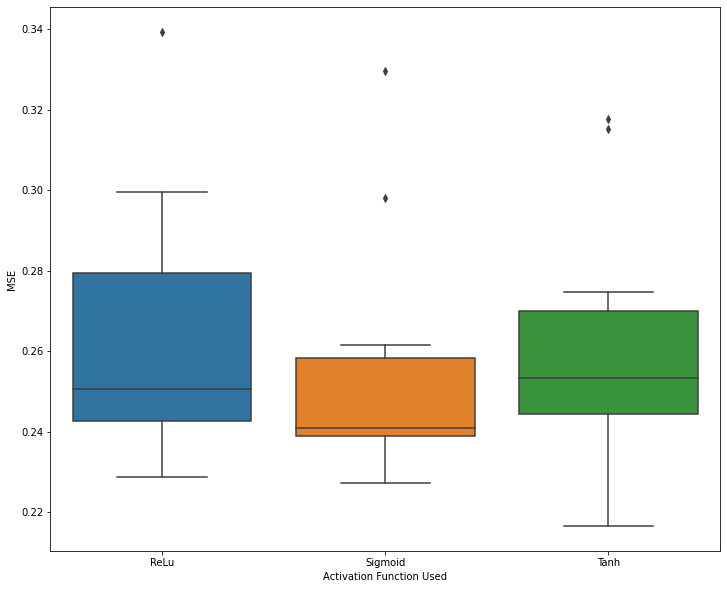

In [45]:
plt.figure(figsize = (12, 10))
ax = sns.boxplot(data = acc_df)
ax.set(ylabel = "MSE", xlabel = "Activation Function Used")
plt.savefig("20.png")

In [ ]:
# f1_df = pd.DataFrame(ac_funcs_f1)
# f1_df = f1_df.T

# f1_df = f1_df.rename(columns = {0:'ReLu', 1:'Sigmoid', 2:'Tanh'})

# plt.figure(figsize = (12, 10))
# ax = sns.boxplot(data = f1_df)
# ax.set(ylabel = "Weighted F1-Score", xlabel = "Activation Function Used")
# plt.savefig("13.png")

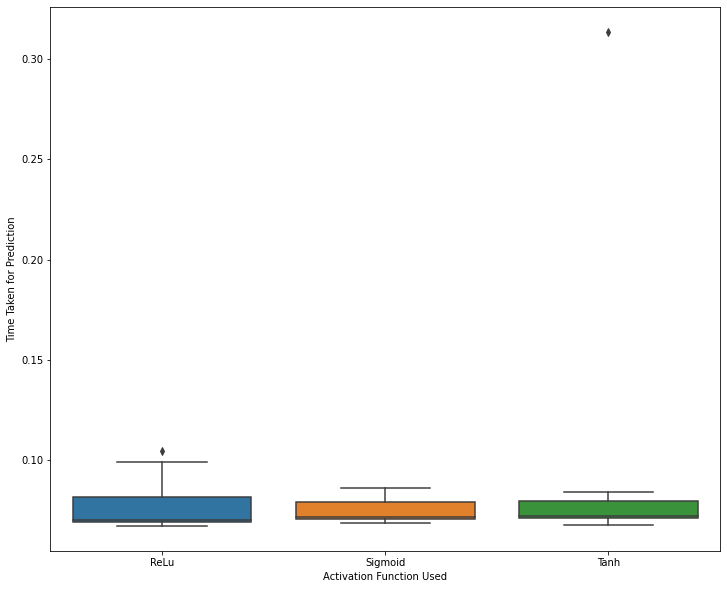

In [46]:
time_df = pd.DataFrame(ac_funcs_score_time)
time_df = time_df.T

time_df = time_df.rename(columns = {0:'ReLu', 1:'Sigmoid', 2:'Tanh'})

plt.figure(figsize = (12, 10))
ax = sns.boxplot(data = time_df)
ax.set(ylabel = "Time Taken for Prediction", xlabel = "Activation Function Used")
plt.savefig("21.png")